# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset
We will be using a banking marketing dataset. 
The dataset is associated with direct marketing campaigns of a banking institution. Your job is to find out the best strategies to improve for the next marketing campaign. How can the bank have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

You have to predict whether a customer subscribes for term deposit or not using the following attributes: 

1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - balance: balance amount (numeric)<br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset. Labels for test dataset are not provided to you because in a real world scenario you will not know the true values for your test set. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_excel("features_ex2.xlsx")
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown


In [3]:
y = pd.read_excel("label_ex2.xlsx")
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [4]:
categories = ['job','marital','education','default','housing','loan','contact','month','poutcome']
categorical = pd.get_dummies(X[categories])
continuous = X.drop(columns=categories)
X = pd.concat([continuous,categorical],axis=1)

In [5]:
#splitting data into train, cv and test set (70:15:15 ratio)
X_train = X.iloc[0:3165,:]
y_train = y.iloc[0:3165,:]
X_cv = X.iloc[3165:3843,:]
y_cv = y.iloc[3165:3843,:]
X_test = X.iloc[3843:4521,:]

In [6]:
print("X_train "+ str(X_train.shape))
print("y_train "+ str(y_train.shape))
print("X_cv "+ str(X_cv.shape))
print("y_cv "+ str(y_cv.shape))
print("X_test "+ str(X_test.shape))

X_train (3165, 50)
y_train (3165, 1)
X_cv (678, 50)
y_cv (678, 1)
X_test (678, 50)


## Standardization

As discussed in previous exercise, standardization is important when a number of features with different scales are involed. 

Q. Use StandardScaler from sklearn.preprocessing to standardize the continuous features. 


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

continuous_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Use the above list to replace the continuous columns in X_train to scaled columns. Use fit_transform method.
X_train[continuous_variables] = scaler.fit_transform(X_train[continuous_variables])

C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
# Similarily use the above list to replace the continuous columns in X_cv and X_test to scaled columns. Use transform method.
X_cv[continuous_variables] = scaler.transform(X_cv[continuous_variables])
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])

C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

## Classification

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Q. Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# First, initialize the classifier with default parameters
logreg = LogisticRegression()

# then fit the classifier on training data and labels
logreg.fit(X_train, y_train)


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# predict the output for cross validation dataset
y_cv_pred = logreg.predict(X_cv)

Implement precision(), recall(), accuracy() in exercise_2.py, and use them below.

In [64]:
def confusion_matrix(truth_values, predicted_values):
    """
    Function to fetch the True positive, true negative, false negative and false positive
    """
    actual_values = truth_values.iloc[:, 0].tolist()
    return {
        'TP': sum(1 for i in range(len(actual_values)) if actual_values[i] == predicted_values[i] == 'yes'),
        'TN': sum(1 for i in range(len(actual_values)) if actual_values[i] == predicted_values[i] == 'no'),
        'FN': sum(1 for i in range(len(actual_values)) if actual_values[i] == 'yes' and predicted_values[i] == 'no'),
        'FP': sum(1 for i in range(len(actual_values)) if actual_values[i] == 'no' and predicted_values[i] == 'yes'),
    }


def accuracy(truth_values, predicted_values):
    """
    Computes accuracy
    :param truth_values: true values
    :param predicted_values: predictions

    :return: accuracy
    """
    _matrix = confusion_matrix(truth_values, predicted_values)
    
    accuracy = (_matrix['TP'] + _matrix['TN']) / sum(_matrix.values())
    
    return accuracy

def precision(truth_values, predicted_values):
    """
    Computes precision
    :param truth_values: true values
    :param predicted_values: predictions

    :return: precision
    """
    _matrix = confusion_matrix(truth_values, predicted_values)
    
    precision = (_matrix['TP']) / (_matrix['TP'] + _matrix['FP'])
    
    return precision


def recall(truth_values, predicted_values):
    """
    Computes recall
    :param truth_values: true values
    :param predicted_values: predictions

    :return: recall
    """
    _matrix = confusion_matrix(truth_values, predicted_values)
    
    recall = _matrix['TP'] / (_matrix['TP'] + _matrix['FN'])

    return recall



In [65]:
# from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

# print(confusion_matrix(y_cv, y_cv_pred))
# print(accuracy_score(y_cv, y_cv_pred))
# print(precision_score(y_cv, y_cv_pred, pos_label='yes'))
# print(recall_score(y_cv, y_cv_pred, pos_label='yes'))

In [66]:
from classification_utils import accuracy, precision, recall

# Using the predictions to calculate accuracy, precision, recall
print(accuracy(y_cv, y_cv_pred))
print(precision(y_cv, y_cv_pred))
print(recall(y_cv, y_cv_pred))

0.8908554572271387
0.45
0.125


Q. Accuracy<br>
Ans - 0.8908554572271387

Q. Precision<br>
Ans - 0.45

Q. Recall<br>
Ans - 0.125

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans - Though accuracy is a good place to start, its not the best way to measure your model's prediction. As the scenarios change we need to use a different metric. For example, if we want to find which stocks should we invest in then we want to look at recall as it would help us identify whether the stocks with a good return are being selected. Similarly, if we want to predict if a patient has cancer then we would want to look at precision as we want to reduce the number of incorrectly classified patients as that would be quite detrimental.

Q. Which metric is suitable in this case? <br>
Ans - In our case, we should look at recall as it would help us reduce the number of people who are not getting correctly classified.

### ROC curve

Q. Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. USe cv set to make predictions.

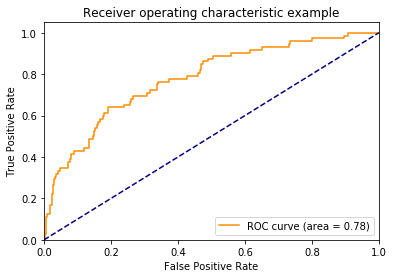

In [67]:
from sklearn.metrics import roc_curve, auc

pred = logreg.predict_proba(X_cv)[:, 1]

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_cv, pred, pos_label='yes')


import matplotlib.pyplot as plt
%matplotlib inline
# Plot the ROC curve by giving appropriate names for title and axes. 

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {auc(fpr, tpr):>.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Q. What is the AOC obtained?<br>
Ans - 0.78

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 





Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [70]:
# model initialization
logreg = LogisticRegression(C=0.1, penalty='l1')

# Training the model
logreg.fit(X_train, y_train)

# Performing predictions
y_cv_pred = logreg.predict(X_cv)

print(accuracy(y_cv, y_cv_pred))
print(precision(y_cv, y_cv_pred))
print(recall(y_cv, y_cv_pred))

0.8982300884955752
0.6
0.125


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [71]:
# model initialization
logreg = LogisticRegression(C=0.5, penalty='l1')

# Training the model
logreg.fit(X_train, y_train)

# Performing predictions
y_cv_pred = logreg.predict(X_cv)

print(accuracy(y_cv, y_cv_pred))
print(precision(y_cv, y_cv_pred))
print(recall(y_cv, y_cv_pred))

0.8938053097345132
0.5
0.1388888888888889


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [77]:
# model initialization
logreg = LogisticRegression(C=0.1, penalty='l2')

# Training the model
logreg.fit(X_train, y_train)

# Performing predictions
y_cv_pred = logreg.predict(X_cv)

print(accuracy(y_cv, y_cv_pred))
print(precision(y_cv, y_cv_pred))
print(recall(y_cv, y_cv_pred))

0.8982300884955752
0.6
0.125


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on cross validation set and compute accuracy, precision and recall. 

In [73]:
# model initialization
logreg = LogisticRegression(C=0.5, penalty='l2')

# Training the model
logreg.fit(X_train, y_train)

# Performing predictions
y_cv_pred = logreg.predict(X_cv)

print(accuracy(y_cv, y_cv_pred))
print(precision(y_cv, y_cv_pred))
print(recall(y_cv, y_cv_pred))

0.8923303834808259
0.47368421052631576
0.125


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q. Which of the above models is better? <br>
Ans- The model with C=0.1 (Regularization) is the best model.

# Test set

You have worked on training and cv dataset so far, but testing data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set. You will submit a csv file containing your predictions names as predictions.csv.


In [84]:
##########################################
### Construct your final logistic regression using the best hyperparameters obtained above(C and penalty) ###
final_model = LogisticRegression(C=0.1, penalty='l1')
final_model.fit(X_train, y_train)
predicted = final_model.predict(X_test)

C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
import csv

with open("predictions.csv", "a", newline='') as fp:
    wr = csv.writer(fp, dialect='excel')
    wr.writerow(predicted)


In [ ]:
#end 